In [1]:
import pandas as pd
import numpy as np
from data_generator.batch_generator import BatchGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint#, TensorBoard
import pickle
from models import AlexNet, LeNetRegressor
from keras import backend as K
%matplotlib inline
K.set_image_data_format('channels_last')

/home/nicoli/github/alexnet/data_generator/batch_generator.py:42: UserWarning: 'BeautifulSoup' module is missing. The XML-parser will be unavailable.
  warnings.warn("'BeautifulSoup' module is missing. The XML-parser will be unavailable.")
Using TensorFlow backend.


In [2]:
test_dataset = BatchGenerator(box_output_format=['class_id'])
test_dataset.parse_csv(labels_filename='/home/nicoli/github/ssd_keras/dataset/csv/imdb_csv/imdb_age_regression_test_split_47950-70-10-20.csv', 
                        images_dir='/home/nicoli/github/ssd_keras/dataset/imdb-hand-crop/',
                        input_format=['image_name', 'class_id'])

In [3]:
print("Number of images in the dataset:", test_dataset.get_n_samples())

Number of images in the dataset: 9590


In [4]:
img_height, img_width, img_depth = (224,224,3)

#epochs = 90

batch_size=100
shuffle = True
ssd_train = False

#validation_batch_size = 10
#batch_size = validation_batch_size

# In[15]:

test_generator = test_dataset.generate(batch_size=batch_size,
                                       shuffle=shuffle,
                                       ssd_train=ssd_train,
                                       flip=0.5,
                                       equalize=True,
                                       divide_by_stddev=255,
                                       returns={'processed_labels'},
                                       resize=(img_height, img_width))

In [5]:
steps = test_dataset.get_n_samples()

In [6]:
alexnet = LeNetRegressor(1, img_width, img_height, img_depth, 'lrelu', weights_path='callbacks/lenet/age/class-weights-reg-fase2-2.15-181.66.hdf5')


# In[7]:


alexnet.model.summary()
#alexnet.model.load_weights('callbacks/alexnet/age/weights.24-1658.03.hdf5')


/home/nicoli/github/alexnet/models.py:78: UserWarning: Considering a regression task with output function being 'relu'
  warnings.warn('Considering a regression task with output function being \'relu\'')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 220, 220, 6)       456       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 220, 220, 6)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 6)       0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 106, 106, 16)      2416      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 106, 106, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 44944)             0         
__________

In [7]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0000000001, amsgrad=True)

In [8]:
alexnet.model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [9]:
prev = next(test_generator)


#prev[1]

In [10]:
predict = alexnet.model.predict(prev[0])

#predict

[17] [23.661081]


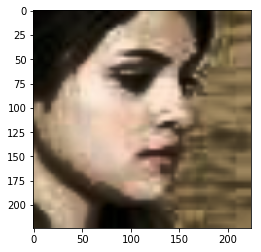

In [11]:
i=4
print(prev[1][i], predict[i])
import matplotlib.pyplot as plt
plt.imshow(prev[0][i])

In [12]:
x =  [i for i in range(batch_size)]

In [13]:
len(x)

100

In [14]:
import pandas as pd
df_results = pd.DataFrame({
    'Ŷ Previsto': prev[1].reshape(batch_size),
    'Y Real': list(predict.reshape(batch_size))#,
    #'Item': [i for i in range(1,batch_size+1)]
}, index=[i for i in range(batch_size)])

In [15]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("", ["0.5","0.1"])
cmap_rev = LinearSegmentedColormap.from_list("", ["0.1","0.5"])

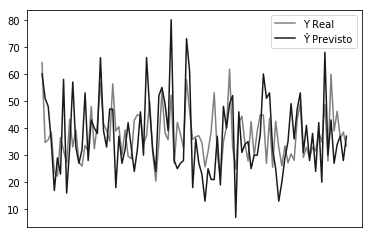

In [16]:
fig = df_results.plot(x=df_results.index, colormap=cmap)
fig.axes.get_xaxis().set_visible(False)

In [17]:
fig.get_figure().savefig('graficos/fig-reta-dif-lenet-relu-data-augmentation-2.2.png')

In [18]:
df_results['Ŷ Previsto'] = df_results['Ŷ Previsto'] - df_results['Y Real']

df_results['Y Real']=0

In [19]:
df_results.rename({'Ŷ Previsto': 'Ŷ Previsto - Y Real', 'Y Real': 'Zero'}, inplace=True, axis=1)

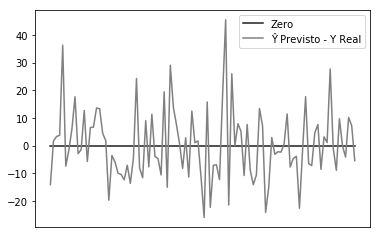

In [20]:
fig = df_results.plot(x=df_results.index, colormap=cmap_rev)
fig.axes.get_xaxis().set_visible(False)

In [21]:
fig.get_figure().savefig('graficos/fig-reta-0-lenet-relu-data-augmentation-2.1.png')

In [22]:
df_results

,Zero,Ŷ Previsto - Y Real
0,0,-14.060280
1,0,1.699991
2,0,3.315357
3,0,3.710257
4,0,36.263298
5,0,-7.409340
6,0,-1.657356
7,0,6.079510
8,0,17.664265
9,0,-2.892567
